In [7]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

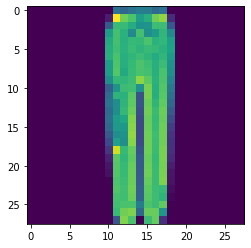

In [9]:
plt.imshow(train_images[1000])

In [51]:
train_images.shape

(60000, 28, 28)

In [13]:
test_images.shape

(10000, 28, 28)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
train_images, test_images = train_images/255, test_images/255

In [22]:
train_images[0].ndim

2

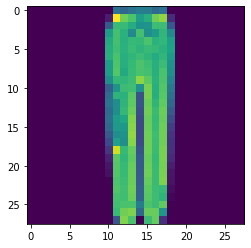

In [15]:
plt.imshow(train_images[1000])

In [1]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
#     plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

NameError: name 'plt' is not defined


# 设置图层
## 神经网络的基本构建基块是层。图层从输入到其中的数据中提取表示形式。希望这些表示对手头的问题有意义。

## 大多数深度学习都包括将简单的层链接在一起。大多数图层，如tf.keras.layers.Dense，都有在训练过程中学习的参数.

In [23]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])
# 第一层：tf.keras.layer.Flatten将图像的格式从二维数组（28 x 28 像素）转换为一维数组（28 × 28 = 784 像素）。
#               将此图层视为在图像中取消堆叠的像素行，并将它们排成一行。此层没有要学习的参数;它只格式化数据。
# 神经网络层：网络由两个tf.keras.layers.dense层组成的序列。
#                  这些是密集连接或完全连接的神经层。第一层有128个节点（或神经元）。
#                   第二个（也是最后一个）图层是 10 节点softmax图层，该图层返回总和为 1 的 10 概率分数数组。
# 每个节点都包含一个分数，指示当前映像属于 10 个类之一的概率。Dense

In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# 编译模型
## 在模型准备好进行训练之前，它需要一些更多的设置。这些在模型的编译步骤中添加：

In [25]:

model.compile(optimizer='adam',# 优化器— 这是模型根据所看到的数据及其丢失功能进行更新的方式。
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),# 损失函数= 此测量模型在训练过程中的准确程度。您希望最小化此函数，以"引导"模型以正确的方向。
              metrics=['accuracy'])# 指标– 用于监视培训和测试步骤。下面的示例使用精度，正确分类的图像的分数。



优化器：https://keras-cn.readthedocs.io/en/latest/other/optimizers/



# 训练模型
## 训练神经网络模型需要以下步骤：

### 1将训练数据馈送到模型。在此示例中，训练数据位于 和 数组中。train_imagestrain_labels
### 2模型学习关联图像和标签。
### 3您要求模型对测试集进行预测，在此示例中为数组。test_images
### 4验证预测是否与数组中的标签匹配。test_labels

In [26]:
history = model.fit(train_images, train_labels, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 196us/sample - loss: 0.5163 - accuracy: 0.8188
Epoch 2/15
60000/60000 [==============================] - 11s 187us/sample - loss: 0.3899 - accuracy: 0.8623
Epoch 3/15
60000/60000 [==============================] - 12s 201us/sample - loss: 0.3548 - accuracy: 0.8707
Epoch 4/15
60000/60000 [==============================] - 11s 182us/sample - loss: 0.3309 - accuracy: 0.8801
Epoch 5/15
60000/60000 [==============================] - 11s 188us/sample - loss: 0.3123 - accuracy: 0.8868
Epoch 6/15
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2982 - accuracy: 0.8906
Epoch 7/15
60000/60000 [==============================] - 10s 170us/sample - loss: 0.2853 - accuracy: 0.8943
Epoch 8/15
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2776 - accuracy: 0.8970
Epoch 9/15
60000/60000 [==============================] - 12s 197us/sample - loss: 0.2690 - accuracy: 0.9

## 评估准确性
### 接下来，比较模型在测试数据集上的性能：

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print(test_loss)

10000/1 - 1s - loss: 0.3295 - accuracy: 0.8804

Test accuracy: 0.8804
0.34578711737394335


# 进行预测
## 经过模型训练后，您可以使用它对某些图像进行预测。模型的线性输出，对。附加 softmax 图层以将日志转换为概率，这更易于解释。

In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)


In [30]:
predictions[0]

array([5.6471627e-09, 7.3525960e-12, 7.8188265e-08, 6.2300534e-12,
       1.1562979e-07, 1.0212803e-03, 1.8863016e-06, 3.2697558e-02,
       1.5227337e-07, 9.6627897e-01], dtype=float32)

### 预测是 10 个数字的数组。它们代表模特的"信心"，即图像对应于10种不同的服装。您可以看到哪个标签的置信度最高：

In [31]:
np.argmax(predictions[3000])

1

In [32]:
test_labels[3000]

1

## 绘制此图形以查看完整的 10 类预测集。



In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## 验证预测
### 经过模型训练后，您可以使用它对某些图像进行预测。

### 让我们看一下第 0 个图像、预测和预测数组。正确的预测标签为蓝色，不正确的预测标签为红色。该数字给出预测标签的百分比（100 个）。

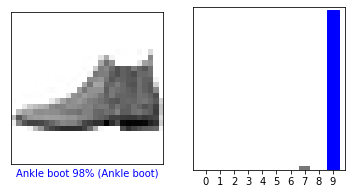

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

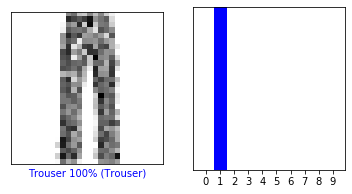

In [53]:
i = 128
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

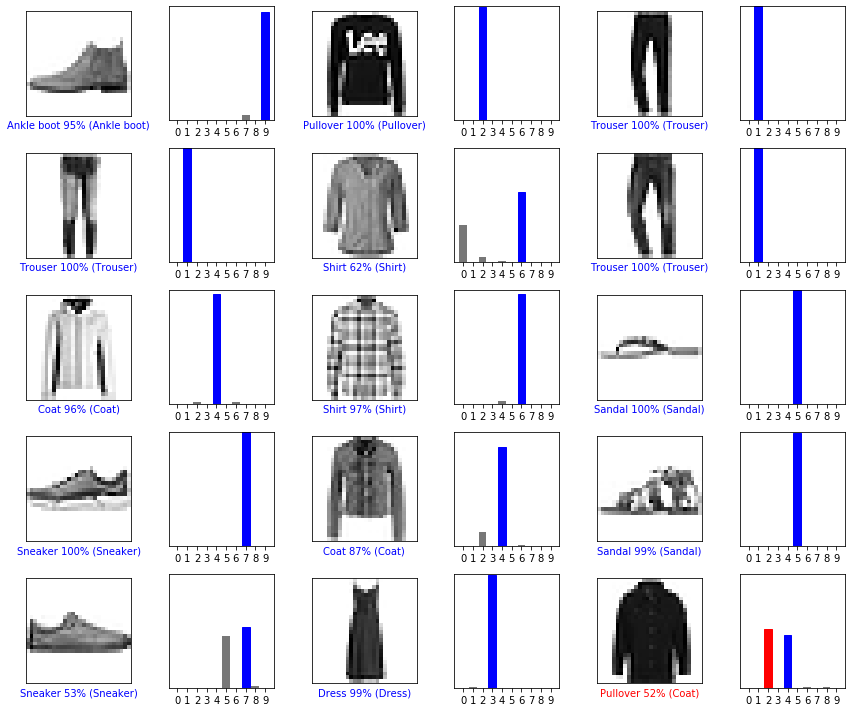

In [73]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 使用经过训练的模型
### 最后，使用训练的模型对单个图像进行预测。

In [79]:
# Grab an image from the test dataset.
img = test_images[9850]

print(img.shape)

(28, 28)


### tf.keras模型经过优化，可以同时对一组或集合的示例进行预测。因此，即使您使用的是单个图像，也需要将其添加到列表中：

In [80]:
img = (np.expand_dims(img,0))
#增加维度np.expand_dims(a, axis)，axis : int or tuple of ints
print(img.shape)

(1, 28, 28)


## 现在预测此图像的正确标签：

In [45]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.3886691e-06 6.6565509e-13 9.9819440e-01 1.6094792e-14 1.7986115e-03
  2.8130043e-15 4.6646819e-06 4.9471407e-21 7.1584626e-12 3.2223680e-16]]


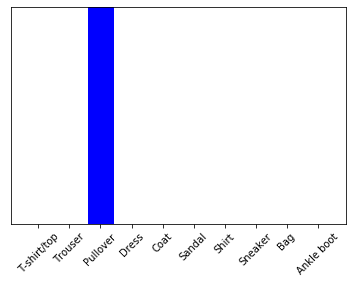

In [46]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

## keras.Model.predict。Model.预测返回列表列表 ， 数据批中每个图像一个列表。获取批处理中我们（仅限）图像的预测：

In [47]:
np.argmax(predictions_single[0])

2